In [97]:
import chess.pgn
from stockfish import Stockfish
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
file_path = '../../dados/experimentos/'
file_name = 'Morphy.pgn'

stockfish = Stockfish(depth=20)

centipawn_eval_by_piece = {}
game_evaluations = []

with open(f'{file_path}{file_name}') as pgn_file:
    game = chess.pgn.read_game(pgn_file)
    board = game.board()
    stockfish.set_fen_position(board.fen())
    for move in game.mainline_moves():
        board.push(move)
        stockfish.make_moves_from_current_position(move.uci())
        eval = stockfish.get_evaluation()
        game_evaluations.append(eval)

        piece_moved = board.piece_at(move.to_square).symbol()
        if piece_moved not in centipawn_eval_by_piece.keys():
            centipawn_eval_by_piece[piece_moved] = []
        centipawn_eval_by_piece[piece_moved].append(eval['value'])
        
# TODO: How to compare mate evaluations with centipawn?


centipawn_eval_by_piece

{'P': [28, 25, 16, 14, 21, 21, 24, 24, 25, 25],
 'p': [28, 29, 18, 16, 18, 25, 23, 25, 24],
 'B': [32, 17, 16, 24, 23, 27, 25, 26, 25, 24],
 'n': [20, 16, 25],
 'N': [23, 16, 24, 16],
 'b': [19, 18, 18, 21, 22, 25, 27],
 'q': [18, 24, 27, 26],
 'K': [18, 28, 27],
 'k': [17],
 'Q': [19],
 'r': [26, 25, 26, 20, 22, 24],
 'R': [21, 26, 22]}

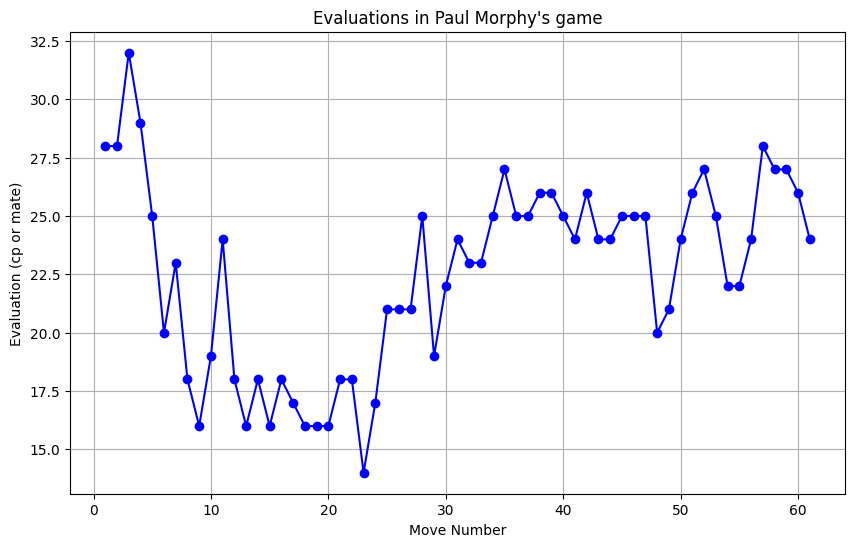

In [100]:
eval_values = []

for eval_data in game_evaluations:
    if eval_data['type'] == 'cp':
        eval_values.append(eval_data['value'])
    elif eval_data['type'] == 'mate':
        eval_values.append(-1000 if '-' in eval_data['value'] else 1000)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(game_evaluations) + 1), eval_values, marker='o', linestyle='-', color='blue')
plt.title('Evaluations in Paul Morphy\'s game')
plt.xlabel('Move Number')
plt.ylabel('Evaluation (cp or mate)')
plt.grid(True)
plt.show()